# This code is for market basket analysis on complete data without slicing

In [1]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing csv file and preprocessing it

In [2]:
cols=['SHDR_IDL','PROD_IDL','PRTYPE_IDL','RPRICE','QUANTITY','DATEORDER']
dtl=pd.read_csv("SalesDTL.csv",parse_dates=['DATEORDER'],
                dtype={'SHDR_IDL':int,'PROD_IDL':int,'PRTYPE_IDL':int,'QUANTITY':int})

#converting column names to lower case
dtl.columns=dtl.columns.str.lower()

#dtl=dtl.set_index("dateorder")
dtl['rprice']=dtl['rprice'].abs()
dtl['total_price']=dtl['rprice']*dtl['quantity']
#dtl=dtl.loc['2016-03-06':,]
dtl['prod_idl']=dtl['prod_idl'].astype('category')
dtl.head()

/home/ummarshaik/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sdtl_idl,shdr_idl,receiptno,prod_idl,prtype_idl,dept_idl,bsp,rprice,inctaxes,cprice,...,omsdtl_idl,orsdtl_idl,oquantity,ocost,obsp,oretail,storeno,otherfee,hog_idl,total_price
0,1.0,1,1.0,3,2,2.0,7.02,7.02,0.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.02
1,2.0,1,1.0,4,2,2.0,3.17,3.17,0.0,22.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.17
2,3.0,2,2.0,3,2,2.0,9.95,9.95,0.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.95
3,4.0,3,3.0,3,2,2.0,9.95,9.95,0.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.95
4,5.0,4,4.0,28,13,2.0,0.00,2.79,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.79


In [3]:
dtl.shape

(565304, 49)

## Rearranging the dataframe for basket analysis (making basket (bills on rows and products as columns)), If the value is '0' then the product is not present and if '1' it is present, one row contains all the products list

In [4]:
basket=dtl.groupby(['shdr_idl', 'prod_idl'])['quantity'].sum().unstack().fillna(0)

In [5]:
basket.shape

(150452, 515)

In [6]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1 

In [7]:
basket_sets = basket.applymap(encode_units)

In [8]:
basket_sets.head()

prod_idl,3,4,12,13,14,16,18,19,22,25,...,612,613,614,615,616,617,618,619,620,621
shdr_idl,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## importing apriori and association rules modules

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Building frequent items

In [10]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

In [11]:
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
1,0.217604,(31)
59,0.210133,(163)
15,0.157027,(65)
44,0.098889,(110)
67,0.088121,(239)
7,0.086619,(56)
29,0.085363,(81)
68,0.084492,(242)
2,0.078145,(42)
24,0.066207,(74)


## Building association rules on frequent item sets

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

## Sorting the association rules according to confidence, here all association rules will be present

In [13]:
#sorting rules according to confidence
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
377,(177),(176),0.009970,0.065795,0.009830,0.986000,14.985925,0.009174,66.728924
381,(180),(178),0.011186,0.062006,0.011027,0.985740,15.897365,0.010333,65.776795
522,"(242, 301)",(54),0.007730,0.057247,0.007557,0.977644,17.077499,0.007115,42.170045
504,"(65, 301)",(54),0.009545,0.057247,0.009299,0.974234,17.017932,0.008752,36.588989
498,"(56, 301)",(54),0.005816,0.057247,0.005636,0.969143,16.929000,0.005303,30.552165
512,"(301, 110)",(54),0.006640,0.057247,0.006414,0.965966,16.873507,0.006034,27.700287
516,"(163, 301)",(54),0.008069,0.057247,0.007730,0.957990,16.734184,0.007268,22.441207
423,"(301, 31)",(54),0.009598,0.057247,0.009159,0.954294,16.669614,0.008610,20.626282
358,(153),(164),0.005550,0.018903,0.005291,0.953293,50.430696,0.005186,21.005538
557,"(297, 110)",(163),0.005896,0.210133,0.005444,0.923337,4.394051,0.004205,10.303112


## Sorting the association rules according to Lift, here all association rules will be present

In [14]:
#sorting rules according to lift
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
358,(153),(164),0.005550,0.018903,0.005291,0.953293,50.430696,0.005186,21.005538
359,(164),(153),0.018903,0.005550,0.005291,0.279887,50.430696,0.005186,1.380965
499,"(56, 54)",(301),0.008880,0.034237,0.005636,0.634731,18.539406,0.005332,2.643975
502,(301),"(56, 54)",0.034237,0.008880,0.005636,0.164628,18.539406,0.005332,1.186442
511,"(110, 54)",(301),0.010209,0.034237,0.006414,0.628255,18.350272,0.006064,2.597920
514,(301),"(110, 54)",0.034237,0.010209,0.006414,0.187342,18.350272,0.006064,1.217968
505,"(65, 54)",(301),0.014982,0.034237,0.009299,0.620674,18.128848,0.008786,2.546000
508,(301),"(65, 54)",0.034237,0.014982,0.009299,0.271598,18.128848,0.008786,1.352300
517,"(163, 54)",(301),0.012702,0.034237,0.007730,0.608582,17.775648,0.007295,2.467344
520,(301),"(163, 54)",0.034237,0.012702,0.007730,0.225781,17.775648,0.007295,1.275219


## Generally we take lift >=2 and confidence >= 0.2,  here our association rules reduced, these are the most important rules

In [15]:
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.2) ].sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
377,(177),(176),0.009970,0.065795,0.009830,0.986000,14.985925,0.009174,66.728924
381,(180),(178),0.011186,0.062006,0.011027,0.985740,15.897365,0.010333,65.776795
522,"(242, 301)",(54),0.007730,0.057247,0.007557,0.977644,17.077499,0.007115,42.170045
504,"(65, 301)",(54),0.009545,0.057247,0.009299,0.974234,17.017932,0.008752,36.588989
498,"(56, 301)",(54),0.005816,0.057247,0.005636,0.969143,16.929000,0.005303,30.552165
512,"(301, 110)",(54),0.006640,0.057247,0.006414,0.965966,16.873507,0.006034,27.700287
516,"(163, 301)",(54),0.008069,0.057247,0.007730,0.957990,16.734184,0.007268,22.441207
423,"(301, 31)",(54),0.009598,0.057247,0.009159,0.954294,16.669614,0.008610,20.626282
358,(153),(164),0.005550,0.018903,0.005291,0.953293,50.430696,0.005186,21.005538
557,"(297, 110)",(163),0.005896,0.210133,0.005444,0.923337,4.394051,0.004205,10.303112


## The relation between confidence and lift by scatter plots, here we can observe some groups

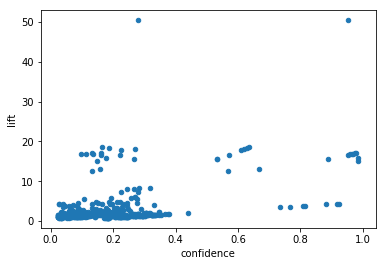

In [16]:
rules.plot.scatter(x='confidence',y='lift')

## Finally the most important association rules are 

In [17]:
important_rules=rules[ (rules['lift'] >= 10) & (rules['confidence'] >= 0.4) ].sort_values(by='confidence',ascending=False)

In [18]:
important_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
377,(177),(176),0.009970,0.065795,0.009830,0.986000,14.985925,0.009174,66.728924
381,(180),(178),0.011186,0.062006,0.011027,0.985740,15.897365,0.010333,65.776795
522,"(242, 301)",(54),0.007730,0.057247,0.007557,0.977644,17.077499,0.007115,42.170045
504,"(65, 301)",(54),0.009545,0.057247,0.009299,0.974234,17.017932,0.008752,36.588989
498,"(56, 301)",(54),0.005816,0.057247,0.005636,0.969143,16.929000,0.005303,30.552165
512,"(301, 110)",(54),0.006640,0.057247,0.006414,0.965966,16.873507,0.006034,27.700287
516,"(163, 301)",(54),0.008069,0.057247,0.007730,0.957990,16.734184,0.007268,22.441207
423,"(301, 31)",(54),0.009598,0.057247,0.009159,0.954294,16.669614,0.008610,20.626282
358,(153),(164),0.005550,0.018903,0.005291,0.953293,50.430696,0.005186,21.005538
150,(301),(54),0.034237,0.057247,0.030422,0.888565,15.521471,0.028462,8.460136
